In [1]:
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot

In [2]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,cluster_std=2, random_state=2)

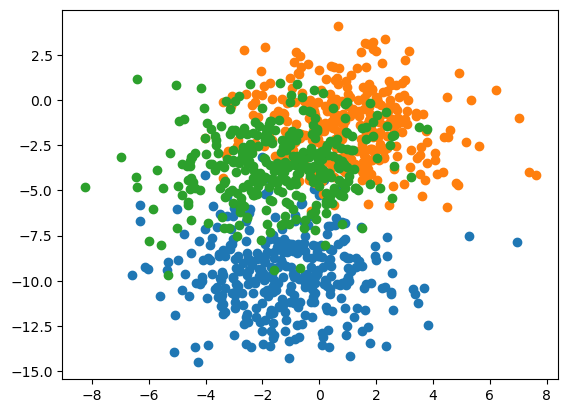

In [3]:
# scatter plot of blobs dataset
# select indices of points with each class label
for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

## Multi Class Cross Entropy Loss Function

In [4]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

Train: 0.838, Test: 0.820


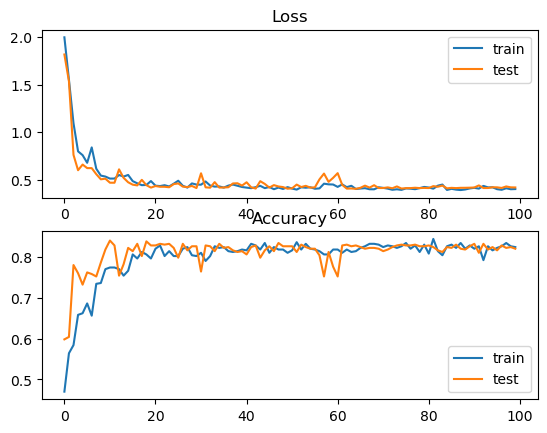

In [5]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy),epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Sparse Multiclass Cross-Entropy Loss

Train: 0.814, Test: 0.830


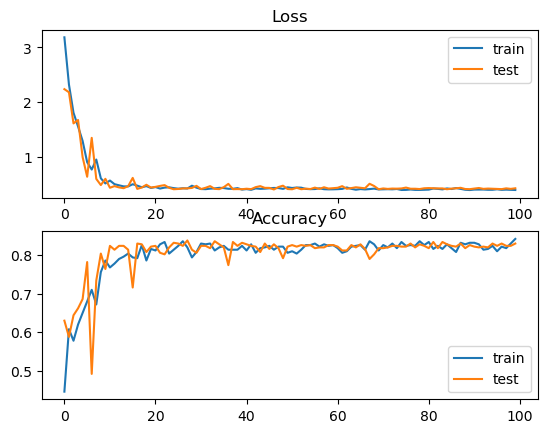

In [6]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,cluster_std=2, random_state=2)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Kullback Leibler Divergence Loss

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt,metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()